# Caminos Más Cortos

En este caso, queremos representar las intersecciones de los caminos de una ciudad mediante vértices de un multi-grafo dirigido ponderado. La ponderación o peso de la arista corresponde al largo del segmento, por lo tanto podemos utilizar el algoritmo Dijsktra para calcular el costo de un camino entre dos puntos. 

In [1]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.8 MB/s 
     |████████████████████████████████| 1.0 MB 37.3 MB/s 
     |████████████████████████████████| 1.0 MB 35.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 11.2 MB 38.8 MB/s 
     |████████████████████████████████| 6.3 MB 43.0 MB/s 
     |████████████████████████████████| 16.7 MB 254 kB/s 
     |████████████████████████████████| 930 kB 9.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Thi

<Figure size 432x288 with 0 Axes>

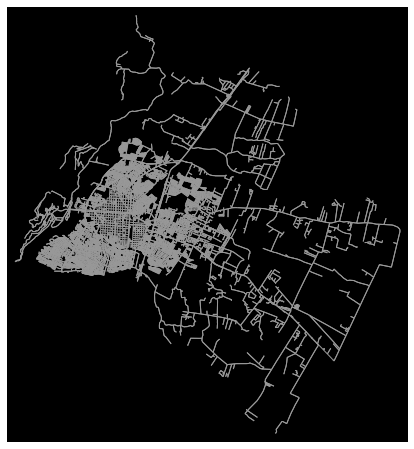

In [16]:
import osmnx as ox
import networkx as nx
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

ox.config(log_file=True, log_console=True, use_cache=True)
G=ox.graph_from_place('Talca,Chile',network_type='all', simplify=True)
#ox.save_graphml(G, filename='talca_ciclovias.graphml')
plt.figure()
ox.plot_graph(ox.project_graph(G),node_size=0, bgcolor='k')
plt.show()




In [17]:
len(G.edges)

30346

In [18]:
G_2=ox.distance.add_edge_lengths(G, precision=3)

In [7]:
nx.is_weakly_connected(G)

True

In [8]:
G_u=G.to_undirected(reciprocal=False, as_view=False)

In [9]:
nx.is_connected(G_u)

True

In [10]:
G.edges

OutMultiEdgeView([(314255271, 5991033068, 0), (314255271, 5991036225, 0), (314255271, 5991036230, 0), (314255305, 1269612456, 0), (314255305, 5991398641, 0), (314255305, 5991398632, 0), (314255751, 2051367209, 0), (314255751, 314255859, 0), (314255751, 8578780933, 0), (314255794, 8578780869, 0), (314255794, 8036335459, 0), (314255794, 8578780946, 0), (314255859, 314255751, 0), (314255859, 5993713381, 0), (314256662, 1269612019, 0), (314256662, 8602636709, 0), (314256662, 1269611983, 0), (314256684, 5123421980, 0), (314256684, 6990881107, 0), (314256684, 3956804833, 0), (314256689, 2520297404, 0), (314256689, 4718618894, 0), (314256689, 2520297377, 0), (314257002, 8578633602, 0), (314257002, 8393748894, 0), (314257002, 2051367221, 0), (314258024, 4806302536, 0), (314258024, 7218797879, 0), (314258024, 9166306555, 0), (314258062, 4359531739, 0), (314258062, 9339100979, 0), (314258062, 5990976559, 0), (314258596, 5987314949, 0), (314258596, 8728078353, 0), (314258596, 8728087112, 0), (314

In [4]:
stats=ox.basic_stats(G)
df=pd.DataFrame(pd.Series(stats)).T
display(df.T) 

,0
n,9855
m,25717
k_avg,5.219077
edge_length_total,2161483.62
edge_length_avg,84.048825
streets_per_node_avg,2.879046
streets_per_node_counts,"{0: 0, 1: 1551, 2: 32, 3: 6358, 4: 1888, 5: 24..."
streets_per_node_proportions,"{0: 0.0, 1: 0.1573820395738204, 2: 0.003247082..."
intersection_count,8304
street_length_total,1179738.86


In [ ]:
origin_point = (-35.434415,-71.620053)
destination_point = (-35.425901, -71.666645)
orig=ox.distance.get_nearest_node(G, origin_point, method='haversine', return_dist=False)
dest=ox.distance.get_nearest_node(G, destination_point, method='haversine', return_dist=False)

print('Inicio : ',G.nodes[orig])
print('Destino : ',G.nodes[dest])

Inicio :  {'y': -35.4345336, 'x': -71.6200011, 'osmid': 3088233301}
Destino :  {'y': -35.4259119, 'x': -71.6666073, 'osmid': 4726125066, 'highway': 'traffic_signals'}


In [ ]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

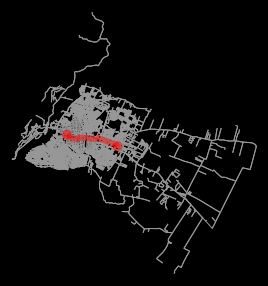

In [ ]:
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k', fig_height=5, fig_width=10)

In [ ]:
print('Largo del camino : ',nx.shortest_path_length(G,source=orig,target=dest,weight='length'))

Largo del camino :  4901.363


In [ ]:
edge_att=nx.get_edge_attributes(G,'length')
list(edge_att.items())[0]

((688160768, 688160766, 0), 75.863)

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(G,u,v):
  lon1, lat1 = G.nodes[u]['y'],G.nodes[u]['x']
  lon2, lat2 = G.nodes[v]['y'],G.nodes[v]['x']
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1 
  dlat = lat2 - lat1 
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * asin(sqrt(a)) 
  r = 6371.*1000 # Radius of earth in kilometers. Use 3956 for miles
  return c * r

def euclidean(G,u,v):
  lon1, lat1 = G.nodes[u]['y'],G.nodes[u]['x']
  lon2, lat2 = G.nodes[v]['y'],G.nodes[v]['x']
  return ox.distance.euclidean_dist_vec(lon1, lat1, lon2, lat2)


print('Distancia Haversine : ',haversine(G,688160768, 688160766))


Distancia Haversine :  71.745661294653


In [ ]:
import numpy as np
from heapq import heappush,heappop

class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    def adjacency_matrix(self):
        pass
    
    def adjacency_list(self):
        pass

    
class weighted_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}
        
    def adjacency_matrix(self):
        n=len(self.nodes)
        mat=np.zeros((n,n))
        adjacent=lambda x : [1 if x==v else 0 for (u,v) in enumerate(sorted(list(G.nodes))) ]
        L=self.adjacency_list()
        i=0
        for v in sorted(list(G.nodes)):
            for l in L[v]:
                mat[i,]+=adjacent(l)
            i=i+1
        return mat
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges.keys() if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}

def dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={}
    distance.update({start:0})
    frontier=[]
    heappush(frontier,(0,start))
    while frontier:
      dist_u,u=heappop(frontier)
      for v in neighbors[u]:
        if (u,v) in G.edges:
          dist_v=dist_u+G.edges[(u,v)]
        else:
          dist_v=dist_u+G.edges[(v,u)]
        if v not in distance.keys() or dist_v<distance[v]:
          path.update({v:u})
          distance.update({v:dist_v})
          heappush(frontier,(dist_v,v))
    return path,distance

In [ ]:
E={(u,v):haversine(G,u,v) for (u,v,w) in G.edges}
G_2=weighted_graph(E)
parent,route_2=dijkstra(G_2,orig)

In [ ]:
def tree_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [ ]:
route_2=tree_path(parent,dest)

In [ ]:
route_2[:10]

[3088233301,
 3088234175,
 3088234233,
 5563329352,
 3797678511,
 535765100,
 775939560,
 2049946733,
 1172866636,
 1172866617]

In [ ]:
route[:10]

[3088233301,
 3088234175,
 3088234233,
 5563329352,
 3797678511,
 535765100,
 775939560,
 2049946733,
 1172866636,
 1172866617]